# <center>Etude sur les Bénéficiaires et l'emplois dans le département de la Manche en 2017</center>
# <center>Pre-process</center>

## Imports

In [37]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## Pre-Process

### Données gégraphiques 

In [38]:
# Données gégraphiques 
df_geo = gpd.read_file('data/s06_a-com2022-topo-2154.json', crs='epsg:3857')

df_geo = df_geo[df_geo['dep']=='50']         # Réduction du jeu de données sur le dpt de la Manche
df_geo = df_geo.drop(['dep', 'reg', 'id', 'xcl2154', 'ycl2154'], axis=1) # Suppression de colonnes inutiles
df_geo = df_geo.reset_index().drop('index', axis=1)


df_geo['codgeo'] = df_geo['codgeo'].astype('int') # Conversion de type


print("Dans la Manche, il y à ",df_geo.shape[0], " communes")
df_geo.head(5)

Dans la Manche, il y à  446  communes


,codgeo,libgeo,geometry
0,50002,Agneaux,"POLYGON ((398900.901 6896890.143, 398461.451 6..."
1,50003,Agon-Coutainville,"POLYGON ((367145.234 6894098.041, 366993.948 6..."
2,50004,Airel,"POLYGON ((402056.296 6912676.259, 402445.318 6..."
3,50006,Amigny,"POLYGON ((394924.238 6901586.602, 394391.135 6..."
4,50008,Anctoville-sur-Boscq,"POLYGON ((368297.889 6870680.179, 368939.054 6..."


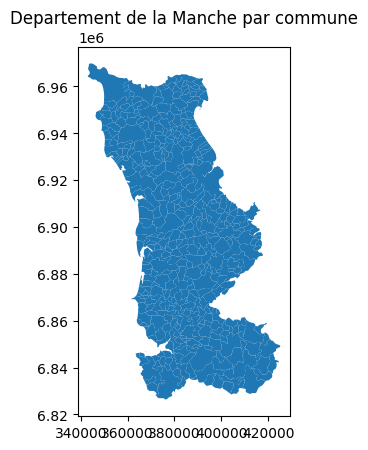

In [39]:
df_geo.plot()
plt.title('Departement de la Manche par commune');

### Données démographiques

In [40]:
col_to_load = ['COM',            # code du département suivi du numéro de commune ou du numéro d'arrondissement municipal pour Paris Lyon et Marseille
               'P19_POP',        # population
               'P19_POP0019',    # nombre de personnes de 0 à 19 ans
               'P19_POP2064',    # nombre de personnes de 20 à 64 ans
               'P19_POP65P',     # nombre de personnes de 65 ans ou plus
               'P19_POPH',       # nombre d'hommes
               'P19_POPF',       # nombre de femmes
               'C19_POP15P',     # nombre de personnes de 15 ans ou plus
               'C19_POP15P_CS1', # nombre de personnes de 15 ans ou plus Agriculteurs exploitants
               'C19_POP15P_CS2', # nombre de personnes de 15 ans ou plus Artisans, Commerçants, Chefs d'entreprise
               'C19_POP15P_CS3', # nombre de personnes de 15 ans ou plus Cadres et Professions intellectuelles supérieures
               'C19_POP15P_CS4', # nombre de personnes de 15 ans ou plus Professions intermédiaires
               'C19_POP15P_CS5', # nombre de personnes de 15 ans ou plus Employés
               'C19_POP15P_CS6', # nombre de personnes de 15 ans ou plus Ouvriers
               'C19_POP15P_CS7', # nombre de personnes de 15 ans ou plus Retraités
               'C19_POP15P_CS8'
               ]

dict_type = {'COM':'str',                 
               'P19_POP':'float64',              
               'P19_POP0019':'float64',    
               'P19_POP2064':'float64',    
               'P19_POP65P':'float64',     
               'P19_POPH':'float64',       
               'P19_POPF':'float64',       
               'C19_POP15P':'float64',     
               'C19_POP15P_CS1':'float64', 
               'C19_POP15P_CS2':'float64', 
               'C19_POP15P_CS3':'float64', 
               'C19_POP15P_CS4':'float64', 
               'C19_POP15P_CS5':'float64', 
               'C19_POP15P_CS6':'float64', 
               'C19_POP15P_CS7':'float64', 
               'C19_POP15P_CS8':'float64'
               }


df_pop = pd.read_csv('data/s04_base-ic-evol-struct-pop-2019.CSV', sep=';', usecols=col_to_load, dtype=dict_type)


df_pop['DEP'] = [x[:2] for x in df_pop['COM']]
df_pop = df_pop[df_pop['DEP']=='50']
df_pop['COM'] = df_pop['COM'].astype('int')

print('Population de la Manche en 2019 :',df_pop['P19_POP'].sum())
print('Nombre de communes dans la Manche :', len(df_pop['COM'].unique()))
print('Nombre de lignes :',df_pop.shape[0])

df_pop.head(5)

Population de la Manche en 2019 : 495045.0
Nombre de communes dans la Manche : 446
Nombre de lignes : 523


,COM,P19_POP,P19_POP0019,P19_POP2064,P19_POP65P,P19_POPH,P19_POPF,C19_POP15P,C19_POP15P_CS1,C19_POP15P_CS2,C19_POP15P_CS3,C19_POP15P_CS4,C19_POP15P_CS5,C19_POP15P_CS6,C19_POP15P_CS7,C19_POP15P_CS8,DEP
22736,50002,4153.0,941.513962,2009.709237,1201.776801,1904.542512,2248.457488,3459.239171,0.000000,151.785486,312.906008,513.361420,459.626372,327.573477,1261.402345,432.584062,50
22737,50003,2796.0,326.141158,1192.593580,1277.265261,1264.550456,1531.449544,2537.895961,43.588091,119.521059,158.002991,307.779944,274.413793,113.945349,1352.106738,168.537995,50
22738,50004,549.0,148.204115,291.793367,109.002518,266.993137,282.006863,429.131401,24.746073,15.127639,5.013469,55.234090,70.774209,85.488050,112.740919,60.006952,50
22739,50006,154.0,43.000000,91.000000,20.000000,80.000000,74.000000,135.000000,0.000000,10.000000,5.000000,15.000000,30.000000,20.000000,25.000000,30.000000,50
22740,50008,443.0,99.902050,271.451025,71.646925,230.077449,212.922551,368.325740,0.000000,35.318907,15.136674,60.546697,95.865604,50.455581,100.911162,10.091116,50


In [41]:
df_pop.isnull().sum(axis = 0)

COM               0
P19_POP           0
P19_POP0019       0
P19_POP2064       0
P19_POP65P        0
P19_POPH          0
P19_POPF          0
C19_POP15P        0
C19_POP15P_CS1    0
C19_POP15P_CS2    0
C19_POP15P_CS3    0
C19_POP15P_CS4    0
C19_POP15P_CS5    0
C19_POP15P_CS6    0
C19_POP15P_CS7    0
C19_POP15P_CS8    0
DEP               0
dtype: int64

In [42]:

to_agg = {'P19_POP':'sum',
          'P19_POP0019':'sum',    
          'P19_POP2064':'sum',    
          'P19_POP65P':'sum',     
          'P19_POPH':'sum',       
          'P19_POPF':'sum',       
          'C19_POP15P':'sum',     
          'C19_POP15P_CS1':'sum', 
          'C19_POP15P_CS2':'sum', 
          'C19_POP15P_CS3':'sum', 
          'C19_POP15P_CS4':'sum', 
          'C19_POP15P_CS5':'sum', 
          'C19_POP15P_CS6':'sum', 
          'C19_POP15P_CS7':'sum', 
          'C19_POP15P_CS8':'sum', 
          }

df_pop = df_pop.groupby('COM').agg(to_agg).reset_index()

print('Nombre de lignes et communes :',df_pop.shape[0])

df_pop.head(10)

Nombre de lignes et communes : 446


,COM,P19_POP,P19_POP0019,P19_POP2064,P19_POP65P,P19_POPH,P19_POPF,C19_POP15P,C19_POP15P_CS1,C19_POP15P_CS2,C19_POP15P_CS3,C19_POP15P_CS4,C19_POP15P_CS5,C19_POP15P_CS6,C19_POP15P_CS7,C19_POP15P_CS8
0,50002,4153.0,941.513962,2009.709237,1201.776801,1904.542512,2248.457488,3459.239171,0.000000,151.785486,312.906008,513.361420,459.626372,327.573477,1261.402345,432.584062
1,50003,2796.0,326.141158,1192.593580,1277.265261,1264.550456,1531.449544,2537.895961,43.588091,119.521059,158.002991,307.779944,274.413793,113.945349,1352.106738,168.537995
2,50004,549.0,148.204115,291.793367,109.002518,266.993137,282.006863,429.131401,24.746073,15.127639,5.013469,55.234090,70.774209,85.488050,112.740919,60.006952
3,50006,154.0,43.000000,91.000000,20.000000,80.000000,74.000000,135.000000,0.000000,10.000000,5.000000,15.000000,30.000000,20.000000,25.000000,30.000000
4,50008,443.0,99.902050,271.451025,71.646925,230.077449,212.922551,368.325740,0.000000,35.318907,15.136674,60.546697,95.865604,50.455581,100.911162,10.091116
5,50013,386.0,75.644146,191.285504,119.070350,190.467176,195.532824,315.274210,4.906203,25.019981,4.906203,39.494850,39.800077,45.196787,136.203807,19.746301
6,50015,651.0,95.619997,298.031819,257.348183,298.818358,352.181642,594.105879,20.344680,15.258510,40.689360,50.861701,91.551061,50.861701,283.849505,40.689360
7,50016,182.0,34.569832,95.575419,51.854749,90.491620,91.508380,147.430168,10.167598,0.000000,0.000000,5.083799,15.251397,40.670391,61.005587,15.251397
8,50019,419.0,97.797236,232.451094,88.751670,202.988478,216.011522,332.571563,30.362781,5.091037,9.998632,28.829018,48.365013,67.816662,108.571809,33.536611
9,50021,75.0,11.000000,45.000000,19.000000,38.000000,37.000000,60.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,40.000000,10.000000


### Bénéficiaires du RSA

In [43]:
# Chargement
rsa_2017 = pd.read_csv('data/s02_NIVCOMRSAPERS2017_corr.csv', sep=';')

# Filtrage sur la Manche
rsa_2017 = rsa_2017[rsa_2017['Numero_departement']=='50']
rsa_2017 = rsa_2017.drop(['Numero_departement'], axis=1)

# Re-typage
dict_type = {'Communes': 'str',
             'Codes_Insee': 'int',
             'NB_Pers_par_Foyer_Alloc':'float64',
             'NB_Pers_couv_RSA':'float64',
             'RSA_SOCLE_non_Majore_Pers_couv':'float64',
             'RSA_SOCLE_Majore_Pers_couv':'float64'
             }

rsa_2017 = rsa_2017.astype(dict_type)


print("Total de bénéficiaires du RSA : ",rsa_2017['NB_Pers_couv_RSA'].sum())
print("Nombre de communes : ",len(rsa_2017['Codes_Insee'].unique()))

rsa_2017.head(5)

Total de bénéficiaires du RSA :  13883.0
Nombre de communes :  476


,Communes,Codes_Insee,NB_Pers_par_Foyer_Alloc,NB_Pers_couv_RSA,RSA_SOCLE_non_Majore_Pers_couv,RSA_SOCLE_Majore_Pers_couv
17923,AGNEAUX,50002,1636.0,127.0,111.0,16.0
17924,AGON-COUTAINVILLE,50003,721.0,40.0,35.0,5.0
17925,AIREL,50004,240.0,17.0,NaN,NaN
17926,AMIGNY,50006,68.0,NaN,NaN,NaN
17927,ANCTEVILLE,50007,82.0,NaN,NaN,NaN


In [44]:
# Détéction des NANs
rsa_2017.isnull().sum(axis = 0)

Communes                            0
Codes_Insee                         0
NB_Pers_par_Foyer_Alloc             4
NB_Pers_couv_RSA                  208
RSA_SOCLE_non_Majore_Pers_couv    393
RSA_SOCLE_Majore_Pers_couv        393
dtype: int64

In [45]:
# Traitement des NANs

# l'INSEE applique une règle de secret statistique : si l'effectif est inférieur ou égal à 5 individus, la valeur est remplacée par ***.

# Cas 1 : les NANs sont remplacés par 1, car si l'entrée existe, c'est qu'il existe au moins 1 personne, donc au min. 1 personne dans le foyer
rsa_2017['NB_Pers_par_Foyer_Alloc'] = rsa_2017['NB_Pers_par_Foyer_Alloc'].fillna(1)

# Cas 2 : les NANs sont remplacées par zéro
rsa_2017['NB_Pers_couv_RSA'] = rsa_2017['NB_Pers_couv_RSA'].fillna(0)
rsa_2017['RSA_SOCLE_non_Majore_Pers_couv'] = rsa_2017['RSA_SOCLE_non_Majore_Pers_couv'].fillna(0)
rsa_2017['RSA_SOCLE_Majore_Pers_couv'] = rsa_2017['RSA_SOCLE_Majore_Pers_couv'].fillna(0)


rsa_2017.isnull().sum(axis = 0)


Communes                          0
Codes_Insee                       0
NB_Pers_par_Foyer_Alloc           0
NB_Pers_couv_RSA                  0
RSA_SOCLE_non_Majore_Pers_couv    0
RSA_SOCLE_Majore_Pers_couv        0
dtype: int64

#### Traitement des villes absente du DataFrame df_pop

In [46]:

to_drop = ['NB_Pers_par_Foyer_Alloc','RSA_SOCLE_non_Majore_Pers_couv','RSA_SOCLE_Majore_Pers_couv', 'libgeo', 'geometry']

# Fusion des deux datasets
df_diff_comm = rsa_2017.merge(right=df_geo, left_on='Codes_Insee', right_on='codgeo', how='outer').drop(to_drop, axis=1)

# Séléction sur les valeurs NAN et nbre de BRSA > 0
df_diff_comm = df_diff_comm[(df_diff_comm.isna().any(axis=1)) & (df_diff_comm['NB_Pers_couv_RSA'] > 0) ]

df_diff_comm

,Communes,Codes_Insee,NB_Pers_couv_RSA,codgeo
7,ANNEVILLE-SUR-MER,50014,8.0,NaN
96,CONTRIERES,50140,7.0,NaN
224,LE MESNILBUS,50308,6.0,NaN
247,MONTMARTIN-EN-GRAIGNES,50348,8.0,NaN
307,RAVENOVILLE,50427,11.0,NaN
353,SAINT-HILAIRE-PETITVILLE,50485,27.0,NaN
368,SAINT-LO-D'OURVILLE,50503,14.0,NaN
379,SAINT-MARTIN-DES-CHAMPS,50516,34.0,NaN
421,SERVIGNY,50573,8.0,NaN
449,TRELLY,50605,10.0,NaN


In [47]:
# Traitement des communes manauqantes

# A partir du 1er janvier 2019, ces communes ont été rattachées à d'autres communes, et ont pris le status de communes déléguées

replace_communes={
    'ANNEVILLE-SUR-MER'	:'Gouville-sur-Mer', 
    'CONTRIERES':'Quettreville-sur-Sienne',
    'LE MESNILBUS':'Saint-Sauveur-Villages',	
    'MONTMARTIN-EN-GRAIGNES':'Carentan-les-Marais',	
    'RAVENOVILLE':'Sainte-Mère-Église',	
    'SAINT-HILAIRE-PETITVILLE':'Carentan-les-Marais',	
    "SAINT-LO-D'OURVILLE":'Port-Bail-sur-Mer',	
    'SAINT-MARTIN-DES-CHAMPS':'Avranches',	
    'SERVIGNY':'Gouville-sur-Mer',	
    'TRELLY':'Quettreville-sur-Sienne'	
    }	

replace_code = {
    50014 : 50215 ,
    50140 : 50419 ,
    50308 : 50550 ,
    50348 : 50099,
    50427 : 50523 ,
    50485 : 50099 ,
    50503 : 50412 ,
    50516 : 50025 ,
    50573 : 50215 ,
    50605 : 50419 ,
    }

# Remplacement par les communes "titulaires"
rsa_2017['Codes_Insee'] = rsa_2017['Codes_Insee'].replace(replace_code)


# Aggrégation en prévision de la fusion
rsa_2017 = rsa_2017.groupby(['Codes_Insee']).agg({'NB_Pers_par_Foyer_Alloc':'sum', 
                                                  'NB_Pers_couv_RSA':'sum',
                                                  'RSA_SOCLE_non_Majore_Pers_couv' :'sum',
                                                  'RSA_SOCLE_Majore_Pers_couv':'sum' 
                                                  }).reset_index()

### Données Emplois

In [48]:
dict_type = {'codgeo':'str',
             'libgeo':'str',
             'an':'int',
             'p_emplt':'float64'}

df_emplois = pd.read_csv('data/s11_insee_rp_hist_1975.csv', sep=';', dtype=dict_type)

# Filtrage sur le département de la Manche
df_emplois['dep'] = [x[:2] for x in df_emplois['codgeo']]
df_emplois = df_emplois[df_emplois['dep']=='50']
df_emplois['codgeo'] = df_emplois['codgeo'].astype('int')

# Filtrage sur l'année 2019
print('années disponibles : ',df_emplois['an'].unique())
df_emplois = df_emplois[df_emplois['an']==2019]


print('Nbre de communes : ',len(df_emplois['codgeo'].unique()))
print("Nombre d'emplois en 2019 dans la Manche : ", df_emplois['p_emplt'].sum())
df_emplois.head(5)

années disponibles :  [1975 1982 1990 1999 2008 2013 2019]
Nbre de communes :  446
Nombre d'emplois en 2019 dans la Manche :  195684.0


,codgeo,libgeo,an,p_emplt,dep
123892,50002,Agneaux,2019,2723.0,50
123899,50003,Agon-Coutainville,2019,941.0,50
123906,50004,Airel,2019,70.0,50
123913,50006,Amigny,2019,16.0,50
123920,50008,Anctoville-sur-Boscq,2019,35.0,50


### Bassins de vie (source INSEE)

In [49]:
col_to_load=['CODGEO', 'BV2022', 'LIBBV2022','DEP']
dict_type = {'CODGEO':'str',
             'BV2022':'str', 
             'LIBBV2022':'str',
             'DEP':'str'}

df_bassin_vie = pd.read_csv('data/s12_BV2022_compo-commune.csv', 
                            sep = ';', 
                            usecols = col_to_load, 
                            dtype = dict_type
                            )

df_bassin_vie = df_bassin_vie[df_bassin_vie['DEP']=='50']
df_bassin_vie['CODGEO'] = df_bassin_vie['CODGEO'].astype('int')

df_bassin_vie.head(5)

,CODGEO,BV2022,LIBBV2022,DEP
17698,50002,50502,Saint-Lô,50
17699,50003,50003,Agon-Coutainville,50
17700,50004,50502,Saint-Lô,50
17701,50006,50502,Saint-Lô,50
17702,50008,50218,Granville,50


### Zones d'atractivités (Source : INSEE)

In [50]:
col_to_load=['CODGEO', 'AAV2020', 'LIBAAV2020', 'CATEAAV2020', 'DEP']
dict_type = {'CODGEO':'str',
             'AAV2020':'str', 
             'LIBAAV2020':'str',
             'CATEAAV2020':'int',
             'DEP':'str'}

df_zone_attractivite = pd.read_csv('data/s13_AAV2020_2022.csv',
                                    sep=';',
                                    usecols = col_to_load,
                                    dtype = dict_type)

df_zone_attractivite = df_zone_attractivite[df_zone_attractivite['DEP']=='50']
df_zone_attractivite['CODGEO'] = df_zone_attractivite['CODGEO'].astype('int')

df_zone_attractivite.head(5)

,CODGEO,AAV2020,LIBAAV2020,CATEAAV2020,DEP
17698,50002,124,Saint-Lô,20,50
17699,50003,205,Coutances,20,50
17700,50004,124,Saint-Lô,20,50
17701,50006,124,Saint-Lô,20,50
17702,50008,186,Granville,20,50


## Fusion des DataSets

In [51]:

# Merge geo et rsa_2017
df = df_geo.merge(right = rsa_2017, left_on = 'codgeo', right_on = 'Codes_Insee', how = 'left').reset_index()
df = df.drop(['Codes_Insee', 'index'], axis=1)

# Merge avec df_pop
df = df.merge(right = df_pop, left_on = 'codgeo', right_on = 'COM', how = 'left').reset_index()
df = df.drop(['index', 'COM'], axis=1)

# Merge avec df_emplois
df = df.merge(right = df_emplois, left_on = 'codgeo', right_on = 'codgeo', how = 'left').reset_index()
df = df.drop(['index', 'libgeo_y', 'an','dep'], axis=1)
df = df.rename(columns = {'libgeo_x':'libgeo', 'p_emplt':'nb_emplois'})

# merge avec df_bassin_vie
df = df.merge(right = df_bassin_vie, left_on = 'codgeo', right_on = 'CODGEO', how = 'left').reset_index()
df = df.drop(['index', 'CODGEO','DEP'], axis=1)

# Merge avec df_zone_attractivite
df = df.merge(right = df_zone_attractivite, left_on = 'codgeo', right_on = 'CODGEO', how = 'left').reset_index()
df = df.drop(['index','CODGEO','DEP'], axis=1)


#print(df.columns)
print('Nombre de communes : ',df.shape[0])
print("Total NB_Pers_couv_RSA : ",df['NB_Pers_couv_RSA'].sum())
print("Total population Manche: ",df['P19_POP'].sum())
df.head(5)

Nombre de communes :  446
Total NB_Pers_couv_RSA :  13883.0
Total population Manche:  495045.0


,codgeo,libgeo,geometry,NB_Pers_par_Foyer_Alloc,NB_Pers_couv_RSA,RSA_SOCLE_non_Majore_Pers_couv,RSA_SOCLE_Majore_Pers_couv,P19_POP,P19_POP0019,P19_POP2064,...,C19_POP15P_CS5,C19_POP15P_CS6,C19_POP15P_CS7,C19_POP15P_CS8,nb_emplois,BV2022,LIBBV2022,AAV2020,LIBAAV2020,CATEAAV2020
0,50002,Agneaux,"POLYGON ((398900.901 6896890.143, 398461.451 6...",1636.0,127.0,111.0,16.0,4153.0,941.513962,2009.709237,...,459.626372,327.573477,1261.402345,432.584062,2723.0,50502,Saint-Lô,124,Saint-Lô,20
1,50003,Agon-Coutainville,"POLYGON ((367145.234 6894098.041, 366993.948 6...",721.0,40.0,35.0,5.0,2796.0,326.141158,1192.593580,...,274.413793,113.945349,1352.106738,168.537995,941.0,50003,Agon-Coutainville,205,Coutances,20
2,50004,Airel,"POLYGON ((402056.296 6912676.259, 402445.318 6...",240.0,17.0,0.0,0.0,549.0,148.204115,291.793367,...,70.774209,85.488050,112.740919,60.006952,70.0,50502,Saint-Lô,124,Saint-Lô,20
3,50006,Amigny,"POLYGON ((394924.238 6901586.602, 394391.135 6...",68.0,0.0,0.0,0.0,154.0,43.000000,91.000000,...,30.000000,20.000000,25.000000,30.000000,16.0,50502,Saint-Lô,124,Saint-Lô,20
4,50008,Anctoville-sur-Boscq,"POLYGON ((368297.889 6870680.179, 368939.054 6...",178.0,0.0,0.0,0.0,443.0,99.902050,271.451025,...,95.865604,50.455581,100.911162,10.091116,35.0,50218,Granville,186,Granville,20


### Gestion des NANs

In [52]:
df.isnull().sum(axis = 0)

codgeo                            0
libgeo                            0
geometry                          0
NB_Pers_par_Foyer_Alloc           0
NB_Pers_couv_RSA                  0
RSA_SOCLE_non_Majore_Pers_couv    0
RSA_SOCLE_Majore_Pers_couv        0
P19_POP                           0
P19_POP0019                       0
P19_POP2064                       0
P19_POP65P                        0
P19_POPH                          0
P19_POPF                          0
C19_POP15P                        0
C19_POP15P_CS1                    0
C19_POP15P_CS2                    0
C19_POP15P_CS3                    0
C19_POP15P_CS4                    0
C19_POP15P_CS5                    0
C19_POP15P_CS6                    0
C19_POP15P_CS7                    0
C19_POP15P_CS8                    0
nb_emplois                        0
BV2022                            0
LIBBV2022                         0
AAV2020                           0
LIBAAV2020                        0
CATEAAV2020                 

## Enregistrement

In [53]:
df.to_file('data/data_Emplois-Manche.geojson', driver='GeoJSON')  
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   codgeo                          446 non-null    int64   
 1   libgeo                          446 non-null    object  
 2   geometry                        446 non-null    geometry
 3   NB_Pers_par_Foyer_Alloc         446 non-null    float64 
 4   NB_Pers_couv_RSA                446 non-null    float64 
 5   RSA_SOCLE_non_Majore_Pers_couv  446 non-null    float64 
 6   RSA_SOCLE_Majore_Pers_couv      446 non-null    float64 
 7   P19_POP                         446 non-null    float64 
 8   P19_POP0019                     446 non-null    float64 
 9   P19_POP2064                     446 non-null    float64 
 10  P19_POP65P                      446 non-null    float64 
 11  P19_POPH                        446 non-null    float64 
 12  P19_POPF      